# Ryan Code

In [3]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt 

In [4]:

#Read in Geographic Data
geographic_data = pd.read_csv(r'Ryan Resources\Geographic_Region_Health_Data.csv')

# Create variable to iterate through "SE" columns in data 
remove_se_columns = [col for col in geographic_data if "SE" in col]

#Use .drop() to remove "SE" columns from data 
geographic_data = geographic_data.drop(columns=remove_se_columns)





#Create an instance variable to store columns 1997 - 2014
column_drop = geographic_data[['1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']]


#Use .drop() to remove columns 1997-2014
geographic_data_cleaned = geographic_data.drop(columns=column_drop)


#Rename 'Characteristic' column to 'Geographic Region' and set that column as index 
geographic_data_cleaned = geographic_data_cleaned.rename(columns={'Characteristic': 'Geographic Region'})

geographic_data_cleaned = geographic_data_cleaned.set_index('Geographic Region')

geographic_data_cleaned


# Transpose data so that the years are now the rows 
geographic_data_transposed = geographic_data_cleaned.transpose()

#Reset index, set the index as 'index' and rename 'index' to 'Year' so that the years are now the index of the data
geographic_data_reset_index = geographic_data_transposed.reset_index()

geographic_data_set_index = geographic_data_reset_index.set_index('index')

geographic_data_final = geographic_data_set_index.rename_axis('Year')

geographic_data_final


#Append 'Medical Care' on each of the region columns in case this data is concatanated or merged with dataframes that contain the same region names
geographic_data_final = geographic_data_final.rename(columns={col: f"{col}_Medical Care" for col in geographic_data_final.columns})


geographic_data_final


Geographic Region,Northeast_Medical Care,Midwest_Medical Care,South_Medical Care,West_Medical Care
Year,,,,
2015,7.7,9.9,11.0,9.5
2016,6.8,10.1,11.7,8.9
2017,6.8,10.3,11.8,9.3
2018,8.7,11.2,12.6,10.2
2019,8.3,11.6,15.0,10.8


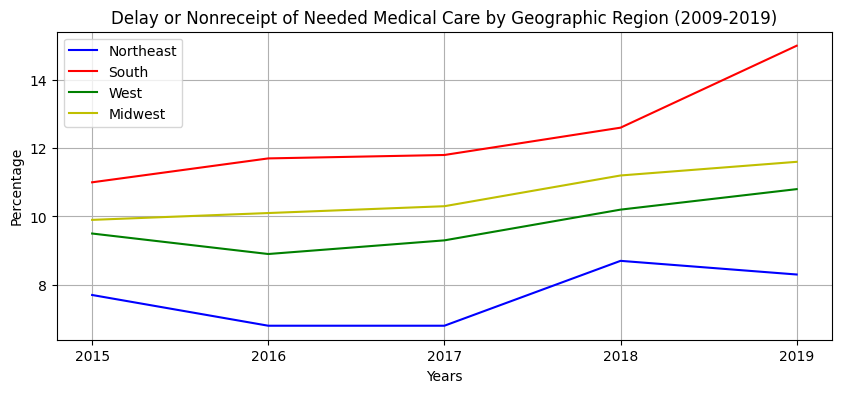

In [81]:
#Create instance variables that store data for each geographic region 

geographic_data_NE = geographic_data_cleaned.loc['Northeast']

geographic_data_south = geographic_data_cleaned.loc['South']
geographic_data_west = geographic_data_cleaned.loc['West']

geographic_data_midwest = geographic_data_cleaned.loc['Midwest']

# iterate through each value in the set index ('Year') and store in an instance variable 
years = [col for col in geographic_data_NE.index]

#Store the row values that are attached to each of the years in the index for each region 
values_ne = geographic_data_NE[years].values

values_south = geographic_data_south[years].values

values_west = geographic_data_west[years].values

values_midwest = geographic_data_midwest[years].values

#Plot the data with necessary information
plt.figure(figsize=[10,4])
plt.plot(years,values_ne,label="Northeast", color='b')
plt.plot(years, values_south, label='South', color='r')
plt.plot(years, values_west, label='West', color='green')
plt.plot(years, values_midwest, label='Midwest', color='y')
plt.xlabel('Years')
plt.ylabel('Percentage')
plt.title('Delay or Nonreceipt of Needed Medical Care by Geographic Region (2009-2019)')
plt.legend()
plt.grid()
plt.show()

# Divorce Rate Datasets & Plots

In [82]:
#Read in File 

state_divorce_data = pd.read_csv(r'Ryan Resources\state-divorce-rates-90-95-00-22.csv')

#Drop all columns named "Unnamed"
drop_unnamed_columns = [col for col in state_divorce_data if "Unnamed" in col]

state_divorce_data = state_divorce_data.drop(columns=drop_unnamed_columns)


#Drop an NaNa Values 
state_divorce_data = state_divorce_data.dropna()



#Rename State Column to 'State(Divorce Rates)'
#state_divorce_data = state_divorce_data.rename(columns={'State': 'State (Divorce Rates)'})

#Set Index to 'State(Divorce Rates)'

state_divorce_data = state_divorce_data.set_index('State')
#state_divorce_data = state_divorce_data.set_index('state_divorce_data["State (Divorce Rates)"]')

state_divorce_data

#Remove Years 1997 to 2019
state_divorce_data_cleaned = state_divorce_data.iloc[:,3:8]

#Reverse the order of the columns 
state_divorce_data_cleaned = state_divorce_data_cleaned[state_divorce_data_cleaned.columns[::-1]]


state_divorce_data_cleaned

,2015,2016,2017,2018,2019
State,,,,,
Alabama,3.9,3.8,3.7,3.7,3.6
Alaska,4.1,3.9,3.6,3.7,3.6
Arizona,3.6,3.4,3.5,3.0,2.9
Arkansas,4.8,3.9,3.7,4.1,4.0
California,---,---,---,---,---
Colorado,3.7,3.6,3.2,3.3,3.3
Connecticut,3.1,3.2,2.9,2.9,2.7
Delaware,3.1,3.1,3.0,2.8,2.9
District of Columbia,2.8,2.7,2.5,2.5,2.4


In [83]:
#Create a dictionary to store states into regions 
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'] } 

#create function that iterates through states dataframe and attaches region name to the state in the regions dictionary
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'


state_divorce_data_cleaned['Region'] = state_divorce_data_cleaned.index.map(get_region)

geographic_divorce_data = state_divorce_data_cleaned.groupby(['Region','State']).sum()

geographic_divorce_data.head()

2015 2016 2017 2018 2019
Region  State                            
Midwest Illinois  2.2  2.2  1.9  1.5  1.3
        Indiana   ---  ---  ---  ---  ---
        Iowa      1.2  1.3  2.0  2.2  2.3
        Kansas    2.8  2.7  2.4  2.3  2.3
        Michigan  3.0  2.9  2.8  2.8  2.3

In [84]:
for col in geographic_divorce_data.columns:

    if col != 'State':
        geographic_divorce_data[col] = pd.to_numeric(geographic_divorce_data[col], errors= 'coerce')

   
geographic_divorce_data = geographic_divorce_data.dropna()


geographic_divorce_data.head()

2015  2016  2017  2018  2019
Region  State                                 
Midwest Illinois   2.2   2.2   1.9   1.5   1.3
        Iowa       1.2   1.3   2.0   2.2   2.3
        Kansas     2.8   2.7   2.4   2.3   2.3
        Michigan   3.0   2.9   2.8   2.8   2.3
        Missouri   3.2   3.3   3.1   3.0   2.9

Create Pivot Tables for each year of Regional Divorce Data (2015-2019)

In [85]:
#Create Pivot Tables for each Region by Year

pivot_divorce_2015 = pd.pivot_table(geographic_divorce_data,values='2015', columns='Region',  aggfunc='mean')

pivot_divorce_2016 = pd.pivot_table(geographic_divorce_data,values='2016', columns='Region', aggfunc='mean')

pivot_divorce_2017 = pd.pivot_table(geographic_divorce_data,values='2017', columns='Region', aggfunc='mean')

pivot_divorce_2018 = pd.pivot_table(geographic_divorce_data,values='2018', columns='Region', aggfunc='mean')

pivot_divorce_2019 = pd.pivot_table(geographic_divorce_data,values='2019', columns='Region', aggfunc='mean')

#Concatanate Pivot Tables 

divorce_pivot_combined = pd.concat([pivot_divorce_2015, pivot_divorce_2016, pivot_divorce_2017, pivot_divorce_2018, pivot_divorce_2019])

#divorce_pivot_renamed = divorce_pivot_combined.set_index('Region')

#Reset Index 
divorce_pivot_reset = divorce_pivot_combined.reset_index()

#divorce_pivot_drop = divorce_pivot_reset.drop(columns=

#divorce_pivot_drop

#Set created 'index' as Index

divorce_pivot_set_index = divorce_pivot_reset.set_index('index')

#Rename 'index' as 'Year 
divorce_pivot_final = divorce_pivot_set_index.rename_axis("Year")

#Append to each columns "_Divorce Rates" to differentiate between Region columns if/when combined into a single DataFrame  
divorce_pivot_final = divorce_pivot_final.rename(columns={col: f"{col}_Divorce Rates" for col in divorce_pivot_final.columns})

divorce_pivot_final

Region,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates
Year,,,,,
2015,2.67,2.955556,2.8,3.480000,3.80
2016,2.65,2.911111,2.7,3.340000,3.70
2017,2.57,2.788889,2.5,3.133333,3.60
2018,2.53,2.822222,2.5,3.093333,3.55
2019,2.40,2.644444,2.4,3.120000,3.42


Summary Statistics for the Regional Divorce Data 

In [86]:
#Run Summary Statistics on Divorce Pivot Table 
divorce_pivot_final.describe()

Region,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2.564000,2.824444,2.580000,3.233333,3.614000
std,0.108074,0.120800,0.164317,0.169312,0.144845
min,2.400000,2.644444,2.400000,3.093333,3.420000
25%,2.530000,2.788889,2.500000,3.120000,3.550000
50%,2.570000,2.822222,2.500000,3.133333,3.600000
75%,2.650000,2.911111,2.700000,3.340000,3.700000
max,2.670000,2.955556,2.800000,3.480000,3.800000


Plot with All Divorce Rates 

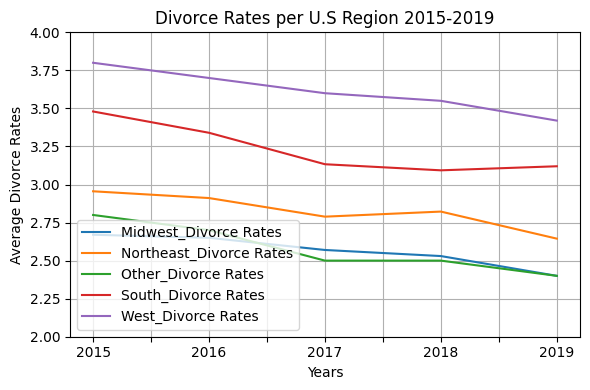

In [87]:
#Plot all Regional Divorce Rates 

divorce_pivot_final.plot(figsize=(6,4))

# Set Y-Axis Limitations 
plt.ylim(2,4)

#Add a Title 
plt.title("Divorce Rates per U.S Region 2015-2019")

#Add X and Y Labels 
plt.xlabel("Years")
plt.ylabel("Average Divorce Rates")

#Add Grid 
plt.grid()

#Add Legend 
plt.legend(loc='lower left')

#Tighten up the Layout 
plt.tight_layout()

#Show Plot 
plt.show()

# State Marriage Dataset and Plots

In [88]:
marriage_state_data = pd.read_csv(r'Ryan Resources\state-marriage-rates-90-95-00-22.csv')

delete_unnamed = [col for col in marriage_state_data if "Unnamed" in col]

marriage_state_data = marriage_state_data.drop(columns=delete_unnamed)





marriage_state_data = marriage_state_data.set_index('State')

marriage_state_data = marriage_state_data.rename(index={"California 1": "California"})

marriage_state_data





marriage_state_data = marriage_state_data[marriage_state_data.columns[::-1]]

marriage_state_data_cleaned = marriage_state_data.iloc[:,11:22]



marriage_state_data_cleaned

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
State,,,,,,,,,,,
Alabama,8.3,8.2,8.4,8.2,7.8,7.8,7.4,7.1,7.0,6.8,6.7
Alaska,7.8,8.0,7.8,7.2,7.3,7.5,7.4,7.1,6.9,6.7,6.5
Arizona,5.6,5.9,5.7,5.6,5.4,5.8,5.9,5.9,5.8,5.5,5.3
Arkansas,10.7,10.8,10.4,10.9,9.8,10.1,10.0,9.9,9.5,8.9,8.4
California,5.8,5.8,5.8,6.0,6.5,6.4,6.2,6.5,6.3,6.0,5.7
Colorado,6.9,6.9,7.0,6.8,6.5,7.1,6.8,7.4,7.3,7.6,7.3
Connecticut,5.9,5.6,5.5,5.2,5.0,5.4,5.3,5.6,5.6,5.3,5.0
Delaware,5.4,5.2,5.2,5.8,6.6,6.0,5.7,5.6,5.5,5.2,5.0
District of Columbia,4.7,7.6,8.7,8.4,10.8,11.8,8.2,8.1,8.2,7.8,7.8


Adding Region Column to the Dataset and grouping by Region and State

In [89]:
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington'] } 


def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'

marriage_state_data_cleaned['Region'] = marriage_state_data.index.map(get_region)

geographic_marriage_data = marriage_state_data_cleaned.groupby(['Region','State']).sum()

geographic_marriage_data

2009  2010  2011  2012  2013  2014  2015  \
Region    State                                                            
Midwest   Illinois               5.7   5.7   5.6   5.8   5.4   6.2   5.9   
          Indiana                7.9   6.3   6.8   6.7   6.6   7.1   6.9   
          Iowa                   7.0   6.9   6.7   6.8   7.4   6.9   6.3   
          Kansas                 6.4   6.4   6.3   6.3   6.0   6.1   5.9   
          Michigan               5.4   5.5   5.7   5.6   5.8   5.8   6.0   
          Minnesota              5.3   5.3   5.6   5.6   6.0   5.9   5.6   
          Missouri               6.5   6.5   6.6   6.5   6.4   6.7   6.8   
          Nebraska               6.6   6.6   6.6   6.7   6.3   6.4   6.4   
          North Dakota           6.4   6.5   6.7   6.6   6.3   6.3   6.2   
          Ohio                   5.8   5.8   5.9   5.8   5.7   5.8   5.9   
          South Dakota           7.3   7.3   7.5   7.5   7.0   7.1   7.2   
          Wisconsin              5.3   5.3   5.3   5.4   5.2   5.7   5.6   
Northeast Connecticut            5.9   5.6   5.5   5.2   5.0   5.4   5.3   
          Maine                  7.1   7.1   7.2   7.3   8.3   7.7   7.6   
          Massachusetts          5.6   5.6   5.5   5.5   5.5   5.6   5.5   
          New Hampshire          6.5   7.3   7.1   6.8   6.9   7.2   6.9   
          New Jersey             5.0   5.1   4.8   4.9   5.1   5.4   5.6   
          New York               6.5   6.5   6.9   7.0   6.9   6.7   7.1   
          Pennsylvania           5.3   5.3   5.3   5.5   5.4   5.8   5.7   
          Rhode Island           5.9   5.8   6.0   6.1   6.2   6.7   6.4   
          Vermont                8.7   9.3   8.3   8.2   9.2   8.7   8.1   
Other     District of Columbia   4.7   7.6   8.7   8.4  10.8  11.8   8.2   
South     Alabama                8.3   8.2   8.4   8.2   7.8   7.8   7.4   
          Arkansas              10.7  10.8  10.4  10.9   9.8  10.1  10.0   
          Delaware               5.4   5.2   5.2   5.8   6.6   6.0   5.7   
          Florida                7.5   7.3   7.4   7.2   7.0   7.3   8.2   
          Georgia                6.6   7.3   6.6   6.5   ---   ---   6.2   
          Kentucky               7.6   7.4   7.5   7.2   7.3   6.9   7.2   
          Louisiana              7.1   6.9   6.4   5.7   6.4   6.9   6.8   
          Maryland               5.8   5.7   5.8   5.6   6.8   6.5   6.2   
          Mississippi            4.8   4.9   4.9   5.8   6.7   6.9   7.0   
          North Carolina         6.6   6.6   6.7   6.6   6.5   6.9   7.0   
          Oklahoma               6.9   7.2   6.9   6.9   7.1   7.1   7.4   
          South Carolina         7.3   7.4   7.2   7.4   7.1   7.6   7.5   
          Tennessee              8.4   8.8   9.0   8.8   8.4   8.4   8.5   
          Texas                  7.1   7.1   7.1   7.3   7.0   6.9   7.2   
          Virginia               6.9   6.8   6.8   6.8   6.7   6.7   7.0   
          West Virginia          6.7   6.7   7.2   7.0   6.6   6.7   6.6   
West      Alaska                 7.8   8.0   7.8   7.2   7.3   7.5   7.4   
          Arizona                5.6   5.9   5.7   5.6   5.4   5.8   5.9   
          California             5.8   5.8   5.8   6.0   6.5   6.4   6.2   
          Colorado               6.9   6.9   7.0   6.8   6.5   7.1   6.8   
          Hawaii                17.2  17.6  17.6  17.5  16.3  17.7  15.9   
          Idaho                  8.9   8.8   8.6   8.2   8.2   8.4   8.2   
          Montana                7.3   7.4   7.8   7.8   7.4   7.9   8.0   
          Nevada                40.3  38.3  36.9  35.1  32.3  31.9  31.0   
          New Mexico             5.0   7.7   8.0   6.9   7.3   8.1   6.2   
          Oregon                 6.6   6.5   6.6   6.6   6.3   6.8   6.9   
          Utah                   8.4   8.5   8.6   8.4   7.5   7.3   8.1   
          Washington             6.0   6.0   6.1   6.3   7.1   7.0   6.2   
          Wyoming                8.0   7.6   7.8   7.6   7.5   7.7   7.3   

   

Change DataType from Object to Float and DROP NA's

In [90]:
for col in geographic_marriage_data.columns:

    if col != 'State':
        geographic_divorce_data[col] = pd.to_numeric(geographic_marriage_data[col], errors= 'coerce')

   
geographic_marriage_data = geographic_marriage_data.dropna()


geographic_marriage_data

2009  2010  2011  2012  2013  2014  2015  \
Region    State                                                            
Midwest   Illinois               5.7   5.7   5.6   5.8   5.4   6.2   5.9   
          Indiana                7.9   6.3   6.8   6.7   6.6   7.1   6.9   
          Iowa                   7.0   6.9   6.7   6.8   7.4   6.9   6.3   
          Kansas                 6.4   6.4   6.3   6.3   6.0   6.1   5.9   
          Michigan               5.4   5.5   5.7   5.6   5.8   5.8   6.0   
          Minnesota              5.3   5.3   5.6   5.6   6.0   5.9   5.6   
          Missouri               6.5   6.5   6.6   6.5   6.4   6.7   6.8   
          Nebraska               6.6   6.6   6.6   6.7   6.3   6.4   6.4   
          North Dakota           6.4   6.5   6.7   6.6   6.3   6.3   6.2   
          Ohio                   5.8   5.8   5.9   5.8   5.7   5.8   5.9   
          South Dakota           7.3   7.3   7.5   7.5   7.0   7.1   7.2   
          Wisconsin              5.3   5.3   5.3   5.4   5.2   5.7   5.6   
Northeast Connecticut            5.9   5.6   5.5   5.2   5.0   5.4   5.3   
          Maine                  7.1   7.1   7.2   7.3   8.3   7.7   7.6   
          Massachusetts          5.6   5.6   5.5   5.5   5.5   5.6   5.5   
          New Hampshire          6.5   7.3   7.1   6.8   6.9   7.2   6.9   
          New Jersey             5.0   5.1   4.8   4.9   5.1   5.4   5.6   
          New York               6.5   6.5   6.9   7.0   6.9   6.7   7.1   
          Pennsylvania           5.3   5.3   5.3   5.5   5.4   5.8   5.7   
          Rhode Island           5.9   5.8   6.0   6.1   6.2   6.7   6.4   
          Vermont                8.7   9.3   8.3   8.2   9.2   8.7   8.1   
Other     District of Columbia   4.7   7.6   8.7   8.4  10.8  11.8   8.2   
South     Alabama                8.3   8.2   8.4   8.2   7.8   7.8   7.4   
          Arkansas              10.7  10.8  10.4  10.9   9.8  10.1  10.0   
          Delaware               5.4   5.2   5.2   5.8   6.6   6.0   5.7   
          Florida                7.5   7.3   7.4   7.2   7.0   7.3   8.2   
          Georgia                6.6   7.3   6.6   6.5   ---   ---   6.2   
          Kentucky               7.6   7.4   7.5   7.2   7.3   6.9   7.2   
          Louisiana              7.1   6.9   6.4   5.7   6.4   6.9   6.8   
          Maryland               5.8   5.7   5.8   5.6   6.8   6.5   6.2   
          Mississippi            4.8   4.9   4.9   5.8   6.7   6.9   7.0   
          North Carolina         6.6   6.6   6.7   6.6   6.5   6.9   7.0   
          Oklahoma               6.9   7.2   6.9   6.9   7.1   7.1   7.4   
          South Carolina         7.3   7.4   7.2   7.4   7.1   7.6   7.5   
          Tennessee              8.4   8.8   9.0   8.8   8.4   8.4   8.5   
          Texas                  7.1   7.1   7.1   7.3   7.0   6.9   7.2   
          Virginia               6.9   6.8   6.8   6.8   6.7   6.7   7.0   
          West Virginia          6.7   6.7   7.2   7.0   6.6   6.7   6.6   
West      Alaska                 7.8   8.0   7.8   7.2   7.3   7.5   7.4   
          Arizona                5.6   5.9   5.7   5.6   5.4   5.8   5.9   
          California             5.8   5.8   5.8   6.0   6.5   6.4   6.2   
          Colorado               6.9   6.9   7.0   6.8   6.5   7.1   6.8   
          Hawaii                17.2  17.6  17.6  17.5  16.3  17.7  15.9   
          Idaho                  8.9   8.8   8.6   8.2   8.2   8.4   8.2   
          Montana                7.3   7.4   7.8   7.8   7.4   7.9   8.0   
          Nevada                40.3  38.3  36.9  35.1  32.3  31.9  31.0   
          New Mexico             5.0   7.7   8.0   6.9   7.3   8.1   6.2   
          Oregon                 6.6   6.5   6.6   6.6   6.3   6.8   6.9   
          Utah                   8.4   8.5   8.6   8.4   7.5   7.3   8.1   
          Washington             6.0   6.0   6.1   6.3   7.1   7.0   6.2   
          Wyoming                8.0   7.6   7.8   7.6   7.5   7.7   7.3   

   

Combined Pivot Data for Marriage Rates based on Geographic Region 

In [91]:
pivot_marriage_2015 = pd.pivot_table(geographic_marriage_data,values='2015', columns='Region',  aggfunc='mean')
pivot_marriage_2016 = pd.pivot_table(geographic_marriage_data,values='2016', columns='Region',  aggfunc='mean')
pivot_marriage_2017 = pd.pivot_table(geographic_marriage_data,values='2017', columns='Region',  aggfunc='mean')
pivot_marriage_2018 = pd.pivot_table(geographic_marriage_data,values='2018', columns='Region',  aggfunc='mean')
pivot_marriage_2019 = pd.pivot_table(geographic_marriage_data,values='2019', columns='Region',  aggfunc='mean')

pivot_marriage_combined = pd.concat([pivot_marriage_2015, pivot_marriage_2016, pivot_marriage_2017, pivot_marriage_2018, pivot_marriage_2019])




marriage_pivot_reset_index = pivot_marriage_combined.reset_index()

marriage_pivot_set_index = marriage_pivot_reset_index.set_index('index')

marriage_pivot_final = marriage_pivot_set_index.rename_axis('Year')

marriage_pivot_final = marriage_pivot_final.rename(columns={col: f"{col}_Marriage Rates" for col in marriage_pivot_final.columns})

marriage_pivot_final

Region,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates
Year,,,,,
2015,6.225000,6.466667,8.2,7.24375,9.546154
2016,6.225000,6.666667,8.1,7.10625,9.415385
2017,6.116667,6.566667,8.2,6.96875,9.276923
2018,5.825000,6.455556,7.8,6.54375,9.038462
2019,5.475000,6.144444,7.8,6.21875,8.692308


Regional Marriage Rate Data Summary Statistics 

In [92]:
marriage_pivot_final.describe()

Region,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.973333,6.460000,8.020000,6.816250,9.193846
std,0.323093,0.196041,0.204939,0.424669,0.337560
min,5.475000,6.144444,7.800000,6.218750,8.692308
25%,5.825000,6.455556,7.800000,6.543750,9.038462
50%,6.116667,6.466667,8.100000,6.968750,9.276923
75%,6.225000,6.566667,8.200000,7.106250,9.415385
max,6.225000,6.666667,8.200000,7.243750,9.546154


All Regional Marriage Rates Plot

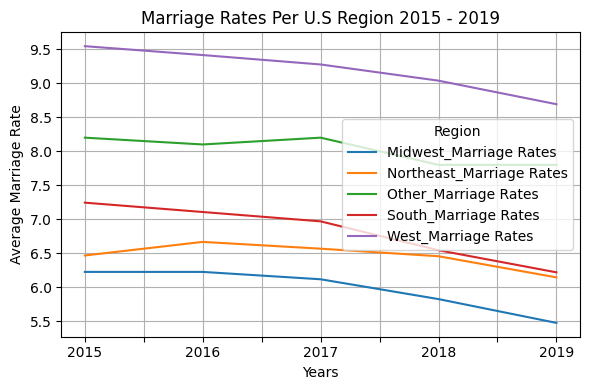

In [93]:
marriage_pivot_final.plot(figsize=[6,4])
plt.title('Marriage Rates Per U.S Region 2015 - 2019')
plt.xlabel("Years")
plt.ylabel("Average Marriage Rate")
plt.grid()
plt.tight_layout()
plt.show()

# Time Series (Prophet) Data for Marriage

In [94]:
marriage_pivot_midwest = marriage_pivot_final[['Midwest_Marriage Rates']].copy()

marriage_pivot_midwest

Region,Midwest_Marriage Rates
Year,
2015,6.225000
2016,6.225000
2017,6.116667
2018,5.825000
2019,5.475000


In [95]:
marriage_pivot_northeast = marriage_pivot_final[['Northeast_Marriage Rates']].copy()

marriage_pivot_northeast

Region,Northeast_Marriage Rates
Year,
2015,6.466667
2016,6.666667
2017,6.566667
2018,6.455556
2019,6.144444


In [96]:
marriage_pivot_west = marriage_pivot_final[['West_Marriage Rates']].copy()

marriage_pivot_west

Region,West_Marriage Rates
Year,
2015,9.546154
2016,9.415385
2017,9.276923
2018,9.038462
2019,8.692308


In [97]:
marriage_pivot_south = marriage_pivot_final[['South_Marriage Rates']].copy()

marriage_pivot_south

Region,South_Marriage Rates
Year,
2015,7.24375
2016,7.10625
2017,6.96875
2018,6.54375
2019,6.21875


# Plotting Marriage and Divorce Graphs Together

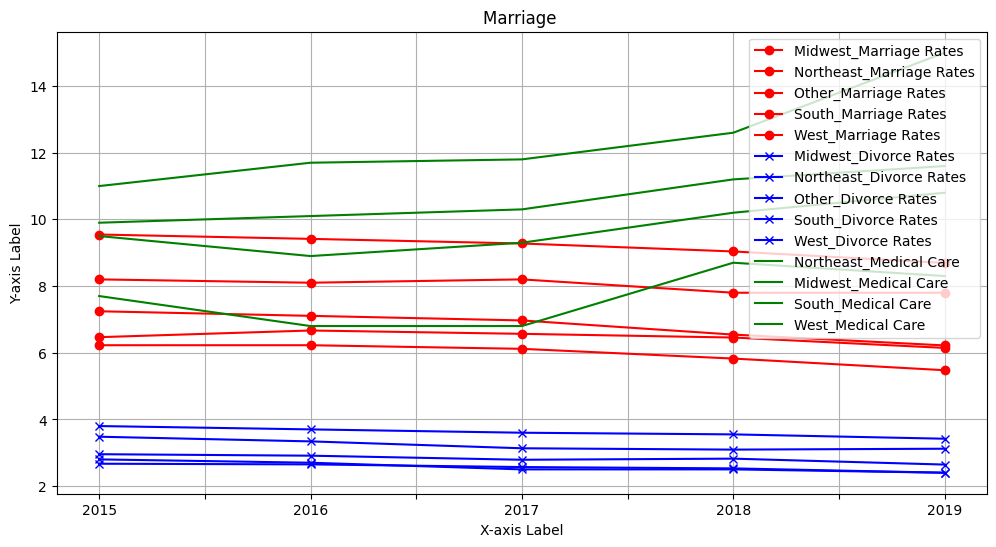

In [98]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot data from each dataframe
marriage_pivot_final.plot(ax=ax, label='Marriage Rates', marker='o', color='r')
divorce_pivot_final.plot(ax=ax, label='Divorce Rates', marker='x', color='b')
geographic_data_final.plot(ax=ax, label='Medical', color='g')

# Customize the plot
plt.title('Marriage ')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.grid()
plt.legend()

# Display the plot
plt.show()

Merging Marriage and Divorce Rates Dataframes

In [99]:
marriage_divorce = pd.merge(marriage_pivot_final, divorce_pivot_final, on='Year')
marriage_divorce

Region,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates
Year,,,,,,,,,,
2015,6.225000,6.466667,8.2,7.24375,9.546154,2.67,2.955556,2.8,3.480000,3.80
2016,6.225000,6.666667,8.1,7.10625,9.415385,2.65,2.911111,2.7,3.340000,3.70
2017,6.116667,6.566667,8.2,6.96875,9.276923,2.57,2.788889,2.5,3.133333,3.60
2018,5.825000,6.455556,7.8,6.54375,9.038462,2.53,2.822222,2.5,3.093333,3.55
2019,5.475000,6.144444,7.8,6.21875,8.692308,2.40,2.644444,2.4,3.120000,3.42


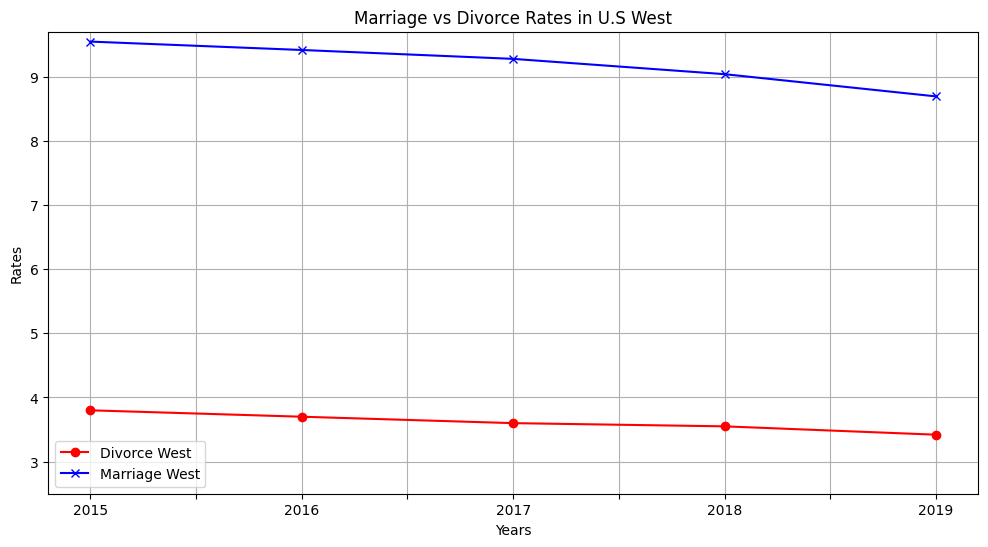

In [100]:
divorce_west = marriage_divorce['West_Divorce Rates']
marriage_west = marriage_divorce['West_Marriage Rates']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_west.plot(ax=ax, label='Divorce West', marker='o', color='r')
marriage_west.plot(ax=ax, label='Marriage West', marker='x', color='b')

plt.title('Marriage vs Divorce Rates in U.S West')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.5,9.7)
plt.grid()
plt.legend()
plt.show()

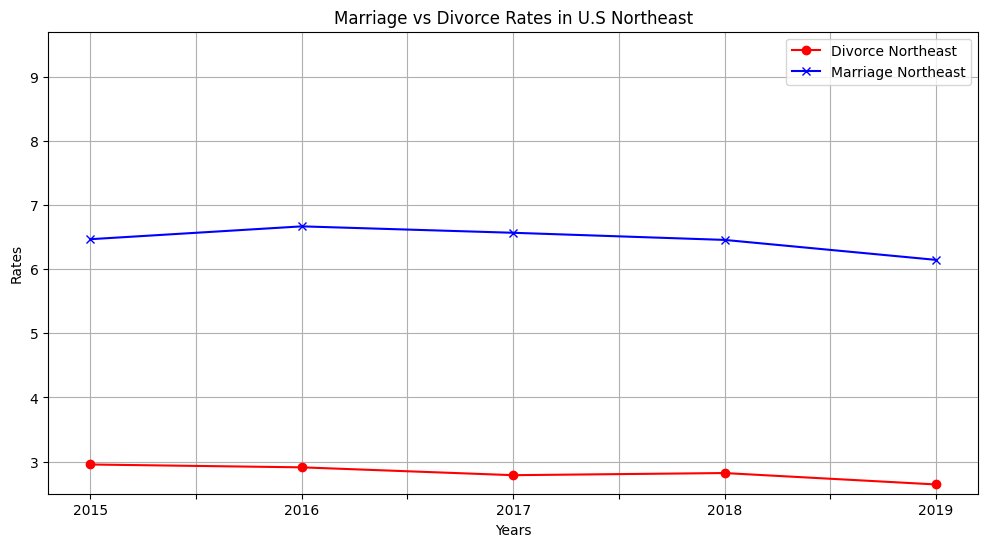

In [101]:
divorce_northeast = marriage_divorce['Northeast_Divorce Rates']
marriage_northeast = marriage_divorce['Northeast_Marriage Rates']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_northeast.plot(ax=ax, label='Divorce Northeast', marker='o', color='r')
marriage_northeast.plot(ax=ax, label='Marriage Northeast', marker='x', color='b')

plt.title('Marriage vs Divorce Rates in U.S Northeast')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.5,9.7)
plt.grid()
plt.legend()
plt.show()

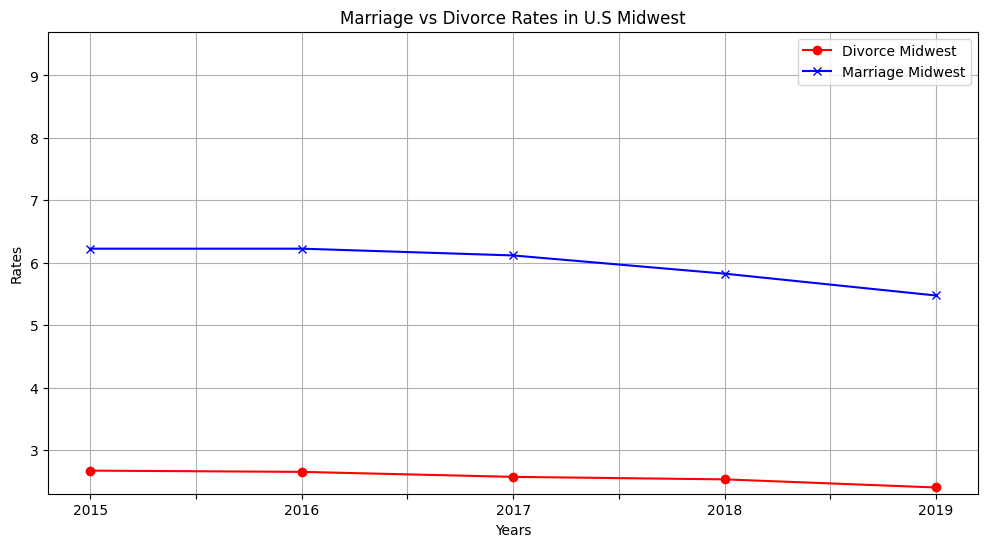

In [102]:
divorce_midwest = marriage_divorce['Midwest_Divorce Rates']
marriage_midwest = marriage_divorce['Midwest_Marriage Rates']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_midwest.plot(ax=ax, label='Divorce Midwest', marker='o', color='r')
marriage_midwest.plot(ax=ax, label='Marriage Midwest', marker='x', color='b')

plt.title('Marriage vs Divorce Rates in U.S Midwest')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.3,9.7)
plt.grid()
plt.legend()
plt.show()

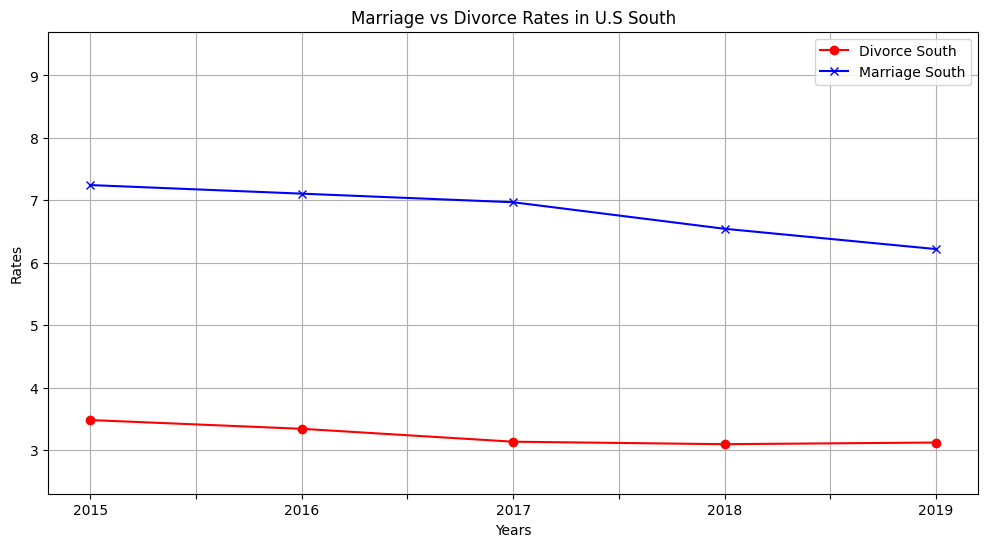

In [103]:
divorce_south = marriage_divorce['South_Divorce Rates']
marriage_south = marriage_divorce['South_Marriage Rates']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_south.plot(ax=ax, label='Divorce South', marker='o', color='r')
marriage_south.plot(ax=ax, label='Marriage South', marker='x', color='b')

plt.title('Marriage vs Divorce Rates in U.S South')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.3,9.7)
plt.grid()
plt.legend()
plt.show()

Marriage and Divorce Summary Statistics

In [104]:
marriage_divorce.describe()

Region,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,5.973333,6.460000,8.020000,6.816250,9.193846,2.564000,2.824444,2.580000,3.233333,3.614000
std,0.323093,0.196041,0.204939,0.424669,0.337560,0.108074,0.120800,0.164317,0.169312,0.144845
min,5.475000,6.144444,7.800000,6.218750,8.692308,2.400000,2.644444,2.400000,3.093333,3.420000
25%,5.825000,6.455556,7.800000,6.543750,9.038462,2.530000,2.788889,2.500000,3.120000,3.550000
50%,6.116667,6.466667,8.100000,6.968750,9.276923,2.570000,2.822222,2.500000,3.133333,3.600000
75%,6.225000,6.566667,8.200000,7.106250,9.415385,2.650000,2.911111,2.700000,3.340000,3.700000
max,6.225000,6.666667,8.200000,7.243750,9.546154,2.670000,2.955556,2.800000,3.480000,3.800000


Marriage and Divorce IQR Data

In [105]:
south_divorce_rates = marriage_divorce['South_Divorce Rates']
Q1 = south_divorce_rates.quantile(0.25)
median_south_divorce = south_divorce_rates.quantile(0.5)
Q3 = south_divorce_rates.quantile(0.75)
IQR = Q3 - Q1

print(f"Q1 = {round(Q1,3)}")
print(f"Median = {round(median_south_divorce,3)}")
print(f"Q3 = {round(Q3,3)}")

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

print(f"Value may be an outlier if below : {round(lower_bound,3)}")
print(f"Value may be an outlier if above: {round(upper_bound,3)}")

Q1 = 3.12
Median = 3.133
Q3 = 3.34
Value may be an outlier if below : 2.79
Value may be an outlier if above: 3.67


# Plot Marriage and/or Divorce Data with Access to Healthcare Data 

In [106]:
healthcare_marriage_divorce = pd.merge(marriage_divorce, geographic_data_final, on='Year')

healthcare_marriage_divorce

,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates,Northeast_Medical Care,Midwest_Medical Care,South_Medical Care,West_Medical Care
Year,,,,,,,,,,,,,,
2015,6.225000,6.466667,8.2,7.24375,9.546154,2.67,2.955556,2.8,3.480000,3.80,7.7,9.9,11.0,9.5
2016,6.225000,6.666667,8.1,7.10625,9.415385,2.65,2.911111,2.7,3.340000,3.70,6.8,10.1,11.7,8.9
2017,6.116667,6.566667,8.2,6.96875,9.276923,2.57,2.788889,2.5,3.133333,3.60,6.8,10.3,11.8,9.3
2018,5.825000,6.455556,7.8,6.54375,9.038462,2.53,2.822222,2.5,3.093333,3.55,8.7,11.2,12.6,10.2
2019,5.475000,6.144444,7.8,6.21875,8.692308,2.40,2.644444,2.4,3.120000,3.42,8.3,11.6,15.0,10.8


Divorce vs Marriage vs Medical Care Rates Data Plots

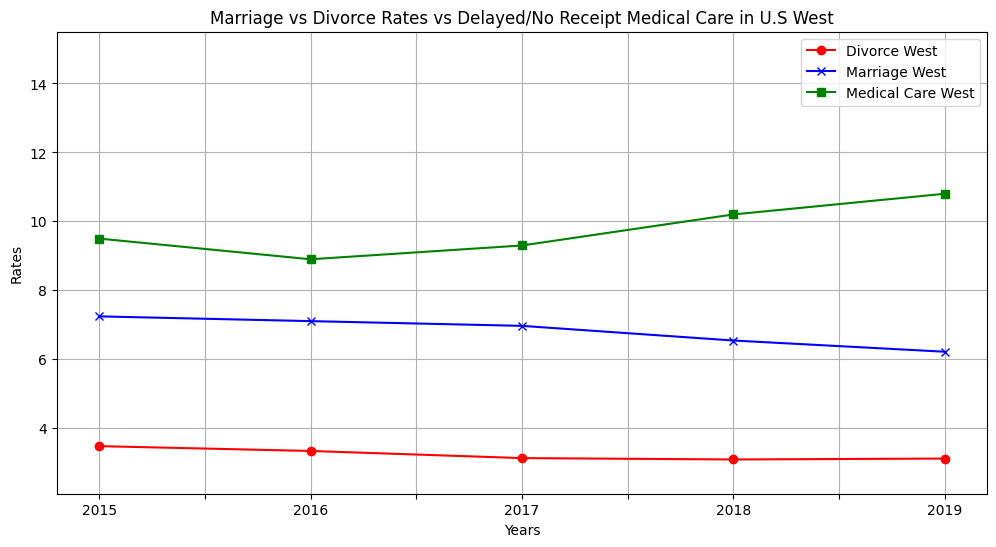

In [107]:
divorce_west = healthcare_marriage_divorce['West_Divorce Rates']
marriage_west = healthcare_marriage_divorce['West_Marriage Rates']
healthcare_west = healthcare_marriage_divorce['West_Medical Care']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_south.plot(ax=ax, label='Divorce West', marker='o', color='r')
marriage_south.plot(ax=ax, label='Marriage West', marker='x', color='b')
healthcare_west.plot(ax=ax, label='Medical Care West', marker='s', color='g')
plt.title('Marriage vs Divorce Rates vs Delayed/No Receipt Medical Care in U.S West')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.1, 15.5)
plt.grid()
plt.legend()
plt.show()

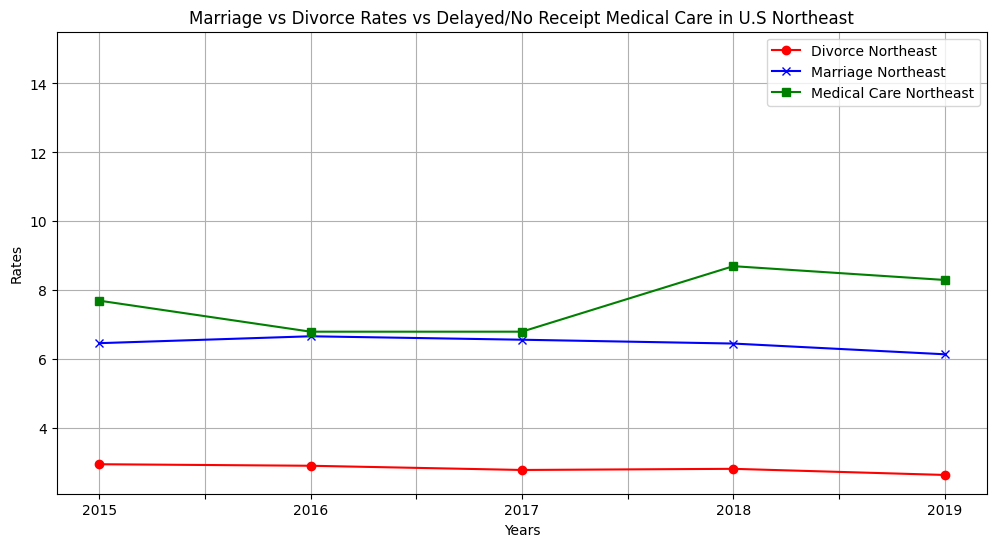

In [108]:
divorce_northeast = healthcare_marriage_divorce['Northeast_Divorce Rates']
marriage_northeast = healthcare_marriage_divorce['Northeast_Marriage Rates']
healthcare_northeast = healthcare_marriage_divorce['Northeast_Medical Care']
fig, ax = plt.subplots(figsize=(12, 6))
divorce_northeast.plot(ax=ax, label='Divorce Northeast', marker='o', color='r')
marriage_northeast.plot(ax=ax, label='Marriage Northeast', marker='x', color='b')
healthcare_northeast.plot(ax=ax, label='Medical Care Northeast', marker='s', color='g')
plt.title('Marriage vs Divorce Rates vs Delayed/No Receipt Medical Care in U.S Northeast')
plt.xlabel('Years')
plt.ylabel('Rates')
plt.ylim(2.1, 15.5)
plt.grid()
plt.legend()
plt.show()

Northeast Correlation Data

In [109]:
#Merge Northeast Divorce and Marriage Data 
northeast_data_part = pd.merge(divorce_northeast, marriage_northeast, on='Year')

#Merge Northeast Divorce and Marriage Data with Healthcare Data 
northeast_data_total = pd.merge(northeast_data_part, healthcare_northeast, on='Year')

northeast_data_total

# Run a correlation on the merged Northeast Data 
northeast_correlation = northeast_data_total.corr()

northeast_correlation

,Northeast_Divorce Rates,Northeast_Marriage Rates,Northeast_Medical Care
Northeast_Divorce Rates,1.000000,0.757995,-0.375079
Northeast_Marriage Rates,0.757995,1.000000,-0.703887
Northeast_Medical Care,-0.375079,-0.703887,1.000000


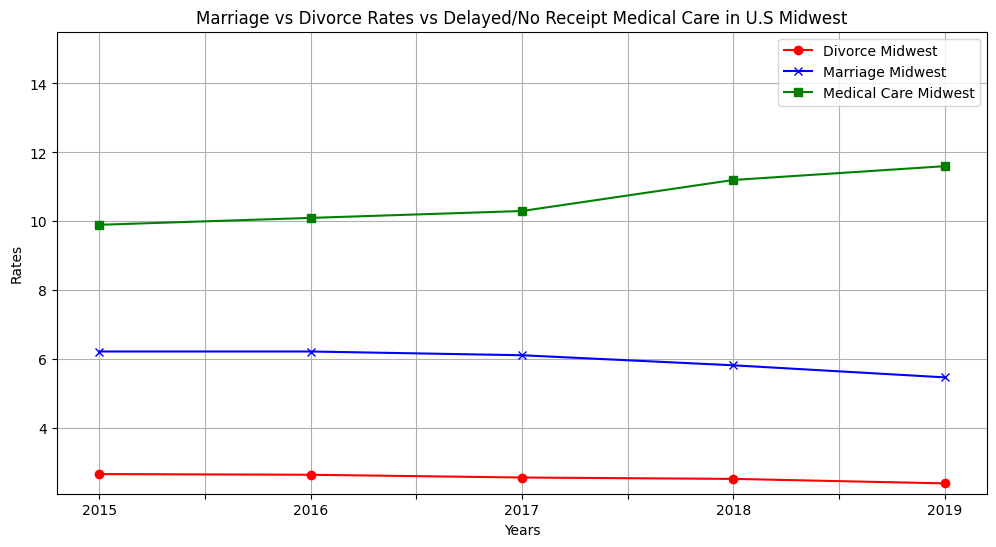

In [110]:
#Parse DataFrame by Region 
divorce_midwest = healthcare_marriage_divorce['Midwest_Divorce Rates']
marriage_midwest = healthcare_marriage_divorce['Midwest_Marriage Rates']
healthcare_midwest = healthcare_marriage_divorce['Midwest_Medical Care']

#Plot Data 
fig, ax = plt.subplots(figsize=(12, 6))
divorce_midwest.plot(ax=ax, label='Divorce Midwest', marker='o', color='r')
marriage_midwest.plot(ax=ax, label='Marriage Midwest', marker='x', color='b')
healthcare_midwest.plot(ax=ax, label='Medical Care Midwest', marker='s', color='g')

#Add Title and Labels 
plt.title('Marriage vs Divorce Rates vs Delayed/No Receipt Medical Care in U.S Midwest')
plt.xlabel('Years')
plt.ylabel('Rates')

#Set Y-Axis Limits 
plt.ylim(2.1, 15.5)

#Add Grid Layout & Legend 
plt.grid()
plt.legend()

#Plot Data 
plt.show()

Midwest Correlation Data 

In [111]:
#Merge Midwest Divorce and Marriage Data 
midwest_data_part = pd.merge(divorce_midwest, marriage_midwest, on='Year')

#Merge Midwest Divorce and Marriage Data with Healthcare Data 
midwest_data_total = pd.merge(midwest_data_part, healthcare_midwest, on='Year')

midwest_data_total

# Run a correlation on the merged Midwest Data 
midwest_correlation = midwest_data_total.corr()

midwest_correlation

,Midwest_Divorce Rates,Midwest_Marriage Rates,Midwest_Medical Care
Midwest_Divorce Rates,1.000000,0.973354,-0.948944
Midwest_Marriage Rates,0.973354,1.000000,-0.975417
Midwest_Medical Care,-0.948944,-0.975417,1.000000


South Plot 

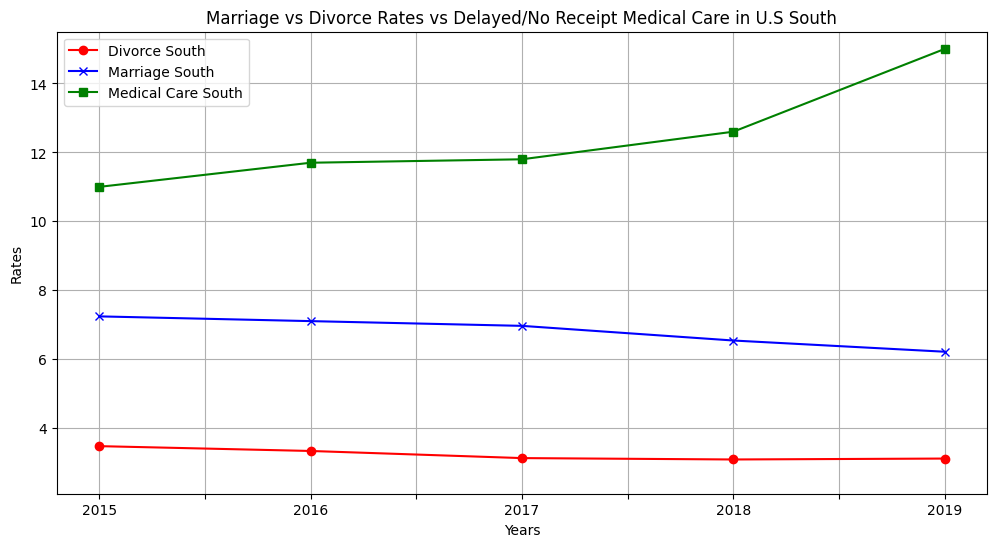

In [112]:
#Parse DataFrame by Region 
divorce_south = healthcare_marriage_divorce['South_Divorce Rates']
marriage_south = healthcare_marriage_divorce['South_Marriage Rates']
healthcare_south = healthcare_marriage_divorce['South_Medical Care']

#Plot Data 
fig, ax = plt.subplots(figsize=(12, 6))
divorce_south.plot(ax=ax, label='Divorce South', marker='o', color='r')
marriage_south.plot(ax=ax, label='Marriage South', marker='x', color='b')
healthcare_south.plot(ax=ax, label='Medical Care South', marker='s', color='g')

#Add Title and Labels 
plt.title('Marriage vs Divorce Rates vs Delayed/No Receipt Medical Care in U.S South')
plt.xlabel('Years')
plt.ylabel('Rates')

#Set Y-Axis Limits 
plt.ylim(2.1, 15.5)

#Add Grid Layout & Legend 
plt.grid()
plt.legend()

#Plot Data 
plt.show()

South Correlation Data

In [113]:
#Merge South Divorce and Marriage Data 
south_data_part = pd.merge(divorce_south,marriage_south, on='Year')

#Merge South Divorce and Marriage Data with Healthcare Data 
south_data_total = pd.merge(south_data_part, healthcare_south, on='Year')

south_data_total

# Run a correlation on the merged South Data 
south_correlation = south_data_total.corr()

south_correlation

,South_Divorce Rates,South_Marriage Rates,South_Medical Care
South_Divorce Rates,1.000000,0.789272,-0.650390
South_Marriage Rates,0.789272,1.000000,-0.949985
South_Medical Care,-0.650390,-0.949985,1.000000


Medical Care vs Marriage vs Divorce Correlation Data 

In [114]:
healthcare_marriage_divorce_corr = healthcare_marriage_divorce.corr()

healthcare_marriage_divorce_corr

,Midwest_Marriage Rates,Northeast_Marriage Rates,Other_Marriage Rates,South_Marriage Rates,West_Marriage Rates,Midwest_Divorce Rates,Northeast_Divorce Rates,Other_Divorce Rates,South_Divorce Rates,West_Divorce Rates,Northeast_Medical Care,Midwest_Medical Care,South_Medical Care,West_Medical Care
Midwest_Marriage Rates,1.000000,0.895528,0.881607,0.985012,0.984080,0.973354,0.895096,0.827219,0.693891,0.922131,-0.720682,-0.975417,-0.968480,-0.952008
Northeast_Marriage Rates,0.895528,1.000000,0.667887,0.807199,0.815817,0.838042,0.757995,0.581204,0.372131,0.695728,-0.703887,-0.790088,-0.855187,-0.941171
Other_Marriage Rates,0.881607,0.667887,1.000000,0.916338,0.869536,0.796890,0.648537,0.683001,0.653242,0.796716,-0.829313,-0.943447,-0.812285,-0.844441
South_Marriage Rates,0.985012,0.807199,0.916338,1.000000,0.993257,0.971905,0.896281,0.881338,0.789272,0.957856,-0.702936,-0.995756,-0.949985,-0.911465
West_Marriage Rates,0.984080,0.815817,0.869536,0.993257,1.000000,0.989754,0.938391,0.902134,0.790948,0.974876,-0.627613,-0.978417,-0.971604,-0.890635
Midwest_Divorce Rates,0.973354,0.838042,0.796890,0.971905,0.989754,1.000000,0.971507,0.920692,0.793335,0.974514,-0.577519,-0.948944,-0.963299,-0.885604
Northeast_Divorce Rates,0.895096,0.757995,0.648537,0.896281,0.938391,0.971507,1.000000,0.940413,0.804921,0.963010,-0.375079,-0.855630,-0.923155,-0.766732
Other_Divorce Rates,0.827219,0.581204,0.683001,0.881338,0.902134,0.920692,0.940413,1.000000,0.958514,0.970571,-0.395377,-0.859886,-0.812834,-0.695436
South_Divorce Rates,0.693891,0.372131,0.653242,0.789272,0.790948,0.793335,0.804921,0.958514,1.000000,0.890964,-0.366582,-0.785269,-0.650390,-0.564381
West_Divorce Rates,0.922131,0.695728,0.796716,0.957856,0.974876,0.974514,0.963010,0.970571,0.890964,1.000000,-0.490979,-0.936744,-0.923666,-0.788470


# Alexandra Code Section


In [115]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

In [116]:
# Read the CSV file
df_2022 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2022.csv')


df_2022.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,990",681,13.6
1,Alaska,708,68,9.6
2,Arizona,"7,239",920,12.7
3,Arkansas,"2,993",496,16.6
4,California,"38,690","4,346",11.2


In [117]:
# List columns
df_2022.columns

Index(['State', 'Total population', 'Number in poverty ',
       'Percent in poverty'],
      dtype='object')

In [118]:
print(df_2022['Total population'].dtype)

object


In [119]:
print(df_2022.head().to_string())

        State Total population Number in poverty   Percent in poverty
0     Alabama            4,990                681                13.6
1      Alaska              708                 68                 9.6
2     Arizona            7,239                920                12.7
3    Arkansas            2,993                496                16.6
4  California           38,690              4,346                11.2


In [120]:
# Clean the data & data type conversion 
df_2022['Total population'] = df_2022['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2022['Number in poverty '] = df_2022['Number in poverty '].replace(',', '', regex=True).astype(float).astype(int)
df_2022['Percent in poverty'] = df_2022['Percent in poverty'].astype(float)

# Set the index
df_2022.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2022.head().to_string())

            Total population  Number in poverty   Percent in poverty
State                                                               
Alabama                 4990                 681                13.6
Alaska                   708                  68                 9.6
Arizona                 7239                 920                12.7
Arkansas                2993                 496                16.6
California             38690                4346                11.2


In [121]:
#Add year to all colums 
df_rename_2022 = df_2022.rename(columns={
    'Total population': 'Total population (2022)',
    'Number in poverty ': 'Number in poverty (2022)',
    'Percent in poverty': 'Percent in poverty (2022)'
})

df_rename_2022.head()

,Total population (2022),Number in poverty (2022),Percent in poverty (2022)
State,,,
Alabama,4990,681,13.6
Alaska,708,68,9.6
Arizona,7239,920,12.7
Arkansas,2993,496,16.6
California,38690,4346,11.2


In [122]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2022 = df_rename_2022.sort_values('Percent in poverty (2022)')
df_sorted_2022

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2022.head()


,Total population (2022),Number in poverty (2022),Percent in poverty (2022)
State,,,
Utah,3338,200,6.0
Wisconsin,5807,386,6.6
Wyoming,562,40,7.1
Minnesota,5626,427,7.6
Nebraska,1946,154,7.9


In [123]:
#assign the new colum names to the DataFrame 
df_sorted_2022.head()

,Total population (2022),Number in poverty (2022),Percent in poverty (2022)
State,,,
Utah,3338,200,6.0
Wisconsin,5807,386,6.6
Wyoming,562,40,7.1
Minnesota,5626,427,7.6
Nebraska,1946,154,7.9


In [124]:
#define the regions and which states belong to each.
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [125]:
#Now, let's create a function to assign a region to each state:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'  # for states not in the defined regions (e.g., District of Columbia)

In [126]:
#Add a new 'Region' column to your DataFrame:
df_rename_2022['Region'] = df_rename_2022.index.map(get_region)
df_rename_2022.head()

,Total population (2022),Number in poverty (2022),Percent in poverty (2022),Region
State,,,,
Alabama,4990,681,13.6,South
Alaska,708,68,9.6,West
Arizona,7239,920,12.7,West
Arkansas,2993,496,16.6,South
California,38690,4346,11.2,West


In [127]:
#Now you can group the data by region:
grouped_by_region_2022 = df_rename_2022.groupby(['Region', 'State']).mean()
grouped_by_region_2022.head()

Total population (2022)  Number in poverty (2022)  \
Region  State                                                         
Midwest Illinois                  12350.0                    1173.0   
        Indiana                    6792.0                     704.0   
        Iowa                       3183.0                     299.0   
        Kansas                     2846.0                     298.0   
        Michigan                   9961.0                    1206.0   

                  Percent in poverty (2022)  
Region  State                                
Midwest Illinois                        9.5  
        Indiana                        10.4  
        Iowa                            9.4  
        Kansas                         10.5  
        Michigan                       12.1

In [128]:
# Read the CSV file
df_2021 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2021.csv')

df_2021.head()

,State,Total population,Number in poverty,Percent in poverty
0,Alabama,"4,961",787,15.9
1,Alaska,712,81,11.4
2,Arizona,"7,303",922,12.6
3,Arkansas,"2,981",502,16.8
4,California,"38,770","4,615",11.9


In [129]:
# List columns
df_2021.columns

Index(['State', 'Total population', 'Number in poverty', 'Percent in poverty'], dtype='object')

In [130]:
#Check index type
print(df_2021['Total population'].dtype)
print(df_2021['Number in poverty'].dtype)
print(df_2021['Percent in poverty'].dtype)

object
object
float64


In [131]:
print(df_2021.head().to_string())

        State Total population Number in poverty  Percent in poverty
0     Alabama            4,961               787                15.9
1      Alaska              712                81                11.4
2     Arizona            7,303               922                12.6
3    Arkansas            2,981               502                16.8
4  California           38,770             4,615                11.9


In [132]:
# Clean the data & data type conversion 
df_2021['Total population'] = df_2021['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2021['Number in poverty'] = df_2021['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2021['Percent in poverty'] = df_2021['Percent in poverty'].astype(float)

# Set the index
df_2021.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2021.head().to_string())

            Total population  Number in poverty  Percent in poverty
State                                                              
Alabama                 4961                787                15.9
Alaska                   712                 81                11.4
Arizona                 7303                922                12.6
Arkansas                2981                502                16.8
California             38770               4615                11.9


In [133]:
#Add year to all colums 
df_rename_2021 = df_2021.rename(columns={
    'Total population': 'Total population (2021)',
    'Number in poverty': 'Number in poverty (2021)',
    'Percent in poverty': 'Percent in poverty (2021)'
})

df_rename_2021.head()

,Total population (2021),Number in poverty (2021),Percent in poverty (2021)
State,,,
Alabama,4961,787,15.9
Alaska,712,81,11.4
Arizona,7303,922,12.6
Arkansas,2981,502,16.8
California,38770,4615,11.9


In [134]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2021 = df_rename_2021.sort_values('Percent in poverty (2021)')
df_sorted_2021

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2021.head()

,Total population (2021),Number in poverty (2021),Percent in poverty (2021)
State,,,
Minnesota,5532,382,6.9
New Hampshire,1390,96,6.9
Kansas,2891,206,7.1
Vermont,631,47,7.5
New Jersey,9220,698,7.6


In [135]:
#define the regions and which states belong to each.
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']

SyntaxError: incomplete input (1026999360.py, line 6)

In [ ]:
#Now, let's create a function to assign a region to each state:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'  # for states not in the defined regions (e.g., District of Columbia)

In [ ]:
#Add a new 'Region' column to your DataFrame:
df_rename_2021['Region'] = df_rename_2021.index.map(get_region)
df_rename_2021.head()

In [ ]:
#Now you can group the data by region:
grouped_by_region_2021 = df_rename_2021.groupby(['Region', 'State']).mean()
grouped_by_region_2021.head()

In [ ]:
# Read the CSV file
df_2020 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2020.csv')

df_2020.head()

In [ ]:
# List columns
df_2020.columns

In [ ]:
#Check index type
print(df_2020['Total population'].dtype)
print(df_2020['Number in poverty'].dtype)
print(df_2020['Percent in poverty'].dtype)

In [ ]:
print(df_2020.head().to_string())

In [ ]:
# Clean the data & data type conversion 
df_2020['Total population'] = df_2020['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2020['Number in poverty'] = df_2020['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2020['Percent in poverty'] = df_2020['Percent in poverty'].astype(float)

# Set the index
df_2020.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2020.head().to_string())

In [ ]:
#Add year to all colums 
df_rename_2020 = df_2020.rename(columns={
    'Total population': 'Total population (2020)',
    'Number in poverty': 'Number in poverty (2020)',
    'Percent in poverty': 'Percent in poverty (2020)'
})

df_rename_2020.head()

In [ ]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2020 = df_rename_2020.sort_values('Percent in poverty (2020)')
df_sorted_2020

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2020.head()

In [ ]:
regions = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New York', 'New Jersey', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [ ]:
#Now, let's create a function to assign a region to each state:
def get_region(state):
    for region, states in regions.items():
        if state in states:
            return region
    return 'Other'  # for states not in the defined regions (e.g., District of Columbia)

In [ ]:
#Add a new "Region" column to your DataFrame 
df_rename_2020['Region'] = df_2020.index.map(get_region)

In [ ]:
#Now you can group the data by region:
grouped_by_region_2020 = df_rename_2020.groupby(['Region', 'State']).mean()
grouped_by_region_2020.head()

In [ ]:
Regions_2020 = grouped_by_region_2020['Percent in poverty (2020)']
Regions_2020

In [ ]:
# Read the CSV file
df_2019 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2019.csv')

df_2019.head()

In [ ]:
# List columns
df_2019.columns

In [ ]:
#Check index type
print(df_2019['Total population'].dtype)
print(df_2019['Number in poverty'].dtype)
print(df_2019['Percent in poverty'].dtype)

In [ ]:
print(df_2019.head().to_string())

In [ ]:
# Clean the data & data type conversion 
df_2019['Total population'] = df_2019['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2019['Number in poverty'] = df_2019['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2019['Percent in poverty'] = df_2019['Percent in poverty'].astype(float)

# Set the index
df_2019.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2019.head().to_string())

In [ ]:
#Add year to all colums 
df_rename_2019 = df_2019.rename(columns={
    'Total population': 'Total population (2019)',
    'Number in poverty': 'Number in poverty (2019)',
    'Percent in poverty': '2019'
})


df_rename_2019.head()

In [ ]:
# Sort the DataFrame by 'Percent in poverty' in ascending order

df_sorted_2019 = df_rename_2019.sort_values('2019')
df_sorted_2019

# Create a simple string table
table = "| State | Total population | Number in poverty | Percent in poverty |\n"
table += "|-------|-------------------------|--------------------------|---------------------|\n"
df_sorted_2019.head()

In [ ]:
#Add a new "Region" column to your DataFrame 
df_rename_2019['Region'] = df_2019.index.map(get_region)

In [ ]:
#Now you can group the data by region:
grouped_by_region_2019 = df_rename_2019.groupby(['Region', 'State']).mean()
grouped_by_region_2019.head()

In [ ]:
####Merged Data for all years 

Regions_combined= pd.merge(grouped_by_region_2019,grouped_by_region_2018, on=['State', 'Region'])
Regions_adding_2017= pd.merge(Regions_combined,grouped_by_region_2017, on=['State', 'Region'])
Regions_adding_2016= pd.merge(Regions_adding_2017,grouped_by_region_2016, on=['State', 'Region'])
Regions_adding_2015= pd.merge(Regions_adding_2016,grouped_by_region_2015, on=['State', 'Region'])

Regions_adding_2015

In [ ]:
Regions_grouped = Regions_combined.groupby('Region').mean()
Regions_grouped

In [ ]:
Region_pivot_2019 = pd.pivot_table(Regions_grouped,values='2019', columns='Region', aggfunc='mean')
Region_pivot_2019

In [ ]:
# Read the CSV file
df_2018 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2018.csv')

df_2018.head()

In [ ]:
# List columns
df_2018.columns

In [ ]:
#Check index type
print(df_2018['Total population '].dtype)
print(df_2018['Number in poverty'].dtype)
print(df_2018['Percent in poverty'].dtype)

In [ ]:
# Clean the data & data type conversion 
df_2018['Total population '] = df_2018['Total population '].replace(',', '', regex=True).astype(float).astype(int)
df_2018['Number in poverty'] = df_2018['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2018['Percent in poverty'] = df_2018['Percent in poverty'].astype(float)

# Set the index
df_2018.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2018.head().to_string())

In [ ]:
#Add year to all colums AND rename Percent in poverty to just year 
df_rename_2018 = df_2018.rename(columns={
    'Total population ': 'Total population (2018)',
    'Number in poverty': 'Number in poverty (2018)',
    'Percent in poverty': '2018'
})


df_rename_2018.head()

In [ ]:
#Group states by regions 2018 

In [ ]:
#Add a new "Region" column to your DataFrame 
df_rename_2018['Region'] = df_2018.index.map(get_region)

In [ ]:
#Now you can group the data by region:
grouped_by_region_2018 = df_rename_2018.groupby(['Region', 'State']).mean()
grouped_by_region_2018.head()

In [ ]:
Region_pivot_2018 = pd.pivot_table(Regions_grouped,values='2018', columns='Region', aggfunc='mean')
Region_pivot_2018

In [ ]:
#2017 DATASET 

In [ ]:
# Read the CSV file
df_2017 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2017.csv')

df_2017.head()

In [ ]:
#Check index type
print(df_2017['Total population'].dtype)
print(df_2017['Number in poverty'].dtype)
print(df_2017['Percent in poverty'].dtype)

In [ ]:
# Clean the data & data type conversion 
df_2017['Total population'] = df_2017['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2017['Number in poverty'] = df_2017['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2017['Percent in poverty'] = df_2017['Percent in poverty'].astype(float)

# Set the index
df_2017.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2017.head().to_string())

In [ ]:
#Add year to all colums rename Percent in Poverty to '2019'
df_rename_2017 = df_2017.rename(columns={
    'Total population': 'Total population (2017)',
    'Number in poverty': 'Number in poverty (2017)',
    'Percent in poverty': '2017'
})


df_rename_2017.head()

In [ ]:
#GROUP STATES BY REGIONS 

In [ ]:
#Add a new "Region" column to your DataFrame 
df_rename_2017['Region'] = df_2017.index.map(get_region)

In [ ]:
#Now you can group the data by region:
grouped_by_region_2017 = df_rename_2017.groupby(['Region', 'State']).mean()
grouped_by_region_2017.head()

In [ ]:
#Now you can group the data by region:
grouped_by_region_2017 = df_rename_2017.groupby(['Region', 'State']).mean()
grouped_by_region_2017.head()

In [ ]:
#Create piviot table for 2017

Region_pivot_2017 = pd.pivot_table(Regions_grouped,values='2017', columns='Region', aggfunc='mean')
Region_pivot_2017

In [ ]:
#2016 Data

In [ ]:
# Read the CSV file
df_2016 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2016.csv')

df_2016.head()

In [ ]:
#Check index type
print(df_2016['Total population'].dtype)
print(df_2016['Number in poverty'].dtype)
print(df_2016['Percent in poverty'].dtype)

In [ ]:
# Clean the data & data type conversion 
df_2016['Total population'] = df_2016['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2016['Number in poverty'] = df_2016['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2016['Percent in poverty'] = df_2016['Percent in poverty'].astype(float)

# Set the index
df_2016.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2016.head().to_string())

In [ ]:
#Add year to all colums rename Percent in Poverty to '2016'
df_rename_2016 = df_2016.rename(columns={
    'Total population': 'Total population (2016)',
    'Number in poverty': 'Number in poverty (2016)',
    'Percent in poverty': '2016'
})


df_rename_2016.head()

In [ ]:
#Group states by regions 

In [ ]:
#Add a new "Region" column to your DataFrame 
df_rename_2016['Region'] = df_2016.index.map(get_region)

In [ ]:
#Now you can group the data by region:
grouped_by_region_2016 = df_rename_2016.groupby(['Region', 'State']).mean()
grouped_by_region_2016.head()

In [ ]:
#Combine years 

Regions_grouped = Regions_adding_2016.groupby('Region').mean()
Regions_grouped

In [ ]:
#Create piviot table for 2016

Region_pivot_2016 = pd.pivot_table(Regions_grouped,values='2016', columns='Region', aggfunc='mean')
Region_pivot_2016

In [ ]:
#2015 data 

In [ ]:
# Read the CSV file
df_2015 = pd.read_csv(r'Alexas Resources\Alexandra Data\Poverty_data_2015.csv')

df_2015.head()

In [ ]:
#Check index type
print(df_2015['Total population'].dtype)
print(df_2015['Number in poverty'].dtype)
print(df_2015['Percent in poverty'].dtype)

In [ ]:
# Clean the data & data type conversion 
df_2015['Total population'] = df_2015['Total population'].replace(',', '', regex=True).astype(float).astype(int)
df_2015['Number in poverty'] = df_2015['Number in poverty'].replace(',', '', regex=True).astype(float).astype(int)
df_2015['Percent in poverty'] = df_2015['Percent in poverty'].astype(float)

# Set the index
df_2015.set_index('State', inplace=True)

# Display the first few rows of the cleaned dataset
print(df_2015.head().to_string())

In [ ]:
#Add year to all colums rename Percent in Poverty to '2015'
df_rename_2015 = df_2015.rename(columns={
    'Total population': 'Total population (2015)',
    'Number in poverty': 'Number in poverty (2015)',
    'Percent in poverty': '2015'
})


df_rename_2015.head()

In [ ]:
#Group states by regions 

In [ ]:
#Add a new "Region" column to your DataFrame 
df_rename_2015['Region'] = df_2015.index.map(get_region)

In [ ]:
#Now you can group the data by region:
grouped_by_region_2015 = df_rename_2015.groupby(['Region', 'State']).mean()
grouped_by_region_2015.head()

In [ ]:
#Combine years 

Regions_grouped = Regions_adding_2015.groupby('Region').mean()
Regions_grouped

In [ ]:
#Create piviot table for 2015

Region_pivot_2015 = pd.pivot_table(Regions_grouped,values='2015', columns='Region', aggfunc='mean')
Region_pivot_2015

In [ ]:
Region_pivot_total= pd.concat([Region_pivot_2019,Region_pivot_2018,Region_pivot_2017,Region_pivot_2016,Region_pivot_2015])
Region_pivot_total

In [ ]:
Region_pivot_reset= Region_pivot_total.reset_index()
Region_pivot_set_index= Region_pivot_reset.set_index('index')
Region_pivot_final= Region_pivot_set_index.rename_axis('Year')
Region_pivot_final

In [ ]:
Region_pivot_final.plot(figsize=(10,8))
plt.show